In [ ]:
# ake tokinize into sentence 
# Tonkenize to words 
# Vectorize: tfidf, or count 
# Models: (LDA, LMF) = used for common [pyldaviz] used to fit and find topics / random forest 

# [pyldaviz] make cool viz from lda models 
# Train test before vectorizing
# Add vector text and df together

# Model can handle data that's different shape 

In [1]:
# Imports 
import pandas as pd
import nltk_helper as nh
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

%matplotlib inline

plt.style.use('seaborn')

In [2]:
# Get data 
books = pd.read_pickle('../data/books.pkl')
books.head()

,title,warning,summary,ch1,ch2,ch3,ch4,ch5
0,Beware Of Chicken,,Jin Rou wanted to be a cultivator who defie...,Beware of Chicken In which a transmigrator ...,I jolted awake to Big D’s furious battle cr...,Bi De knew fury. One of the red ones had ve...,There were many ways Meiling expected her d...,Jin surely could have left first thing in t...
1,The Perfect Run,,The Perfect Run is now available on Amazon ...,"It was May 8th, 2020 for the third time, an...",Ryan always did science in his underwear. C...,"As per the name, the Bakuto was a Japan-the...","It was May 10th, 2020 for the first time, a...",Bugs Bunny. The rabbit was Ryan’s most belo...
2,Kairos: A Greek Myth LitRPG,,It has been centuries since mortals unlocke...,"Kairos was coating his spear with poison, w...","It took three days, but home was within sig...","In the marshes north of Lissala, there was ...",When mortal heroes overthrew the old gods d...,The Foresight reached the island of Scheria...
3,Vigor Mortis,,In a world of sky islands orbiting around a...,"“Stop, thief!” I can’t help but wonder why ...",I sit in stunned silence for a short moment...,Maybe having parents isn’t all that great a...,"“All right, kiddo. How about you tell me th...",Oh no. Oh shit. Act natural. Just act natur...
4,A Journey of Black and Red,,Where am I? What is this! I... I don't reme...,"Where… where am I? I take a deep breath in,...",I seethe. The Asian man stares at me with a...,My best friend locks arms with me as we wal...,The last harmonies of the hymn wash over th...,"“Aunt Catherine!” “Ma petite chérie, I am s..."


In [14]:
# Prepair text 
def prep_text(text):
    words = nh.tokenize(text)
    words = nh.clean(words)
    return nh.stem_lem(words)

In [35]:
# Make a tifd vector
tfid = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid.fit(books.summary)
# Trasform and get features names
X_sum = tfid.transform(books.summary)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [5]:
# Fit NMF 
def fit_nmf(data, n = 5, max_i = 500):
    nmf = NMF(n_components = n, max_iter = max_i)
    nmf.fit(data)
    W = nmf.transform(data)
    H = nmf.components_
    return nmf.reconstruction_err_

In [38]:
# Find the optimal number of components 
def plot_error(X = None, n = 10, title = ''):
    error = [fit_nmf(X, n = i) for i in range(1,n)]
    plt.plot(range(1,n), error)
    plt.xticks(range(1, n))
    plt.xlabel('N Components')
    plt.ylabel('Reconstruction Errror')
    plt.title(title)

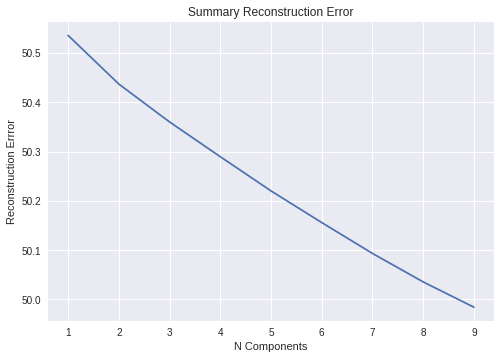

In [39]:
plot_error(X_sum, n = 10, title = 'Summary Reconstruction Error')

In [46]:
def compute_nmf(data, tfid, n = 3):
    # Make NMF model 
    nmf_model = NMF(n_components = n, random_state = 0)
    W = nmf_model.fit_transform(data)
    H = nmf_model.components_
    
    df_W = pd.DataFrame(W, index = books.title)
    df_H = pd.DataFrame(H, columns = tfid.get_feature_names())
    
    # Return data fame H and W
    return df_W, df_H

In [47]:
W, H = compute_nmf(X_sum, tfid, 3)

In [48]:
H.T

,0,1,2
aaalllllaaaaallllaaaaallllaaaa,0.000402,0.000000,0.000000
aagi,0.002166,0.000000,0.000000
aanya,0.003834,0.000751,0.000000
aaron,0.019171,0.005905,0.000000
ab,0.001493,0.000000,0.000351
...,...,...,...
zookeeper,0.000435,0.000000,0.002073
zoot,0.001153,0.000309,0.000000
zor,0.000745,0.001785,0.000000
zorin,0.001953,0.000000,0.000000


In [44]:
W

,0,1,2
title,,,
Beware Of Chicken,0.023287,0.005696,0.028453
The Perfect Run,0.051931,0.010615,0.007731
Kairos: A Greek Myth LitRPG,0.046416,0.000000,0.001194
Vigor Mortis,0.039246,0.043551,0.000913
A Journey of Black and Red,0.007108,0.057028,0.006553
...,...,...,...
Grand road,0.001614,0.093780,0.000000
Paper Aeroplanes,0.012799,0.007610,0.021153
Game Creator System,0.000000,0.000000,0.222317


In [60]:
def word_concept(H, prow, pcol):
    # Top 10 words in concept
    words_concept = []

    for con in range(0, H.shape[0]):
        words_concept.append(H.iloc[con].sort_values(ascending = False)[0:10])

    # Draw Chart
    fig, axs = plt.subplots(prow, pcol, figsize = (10, 4))

    for i, ax in enumerate(axs.flatten()):
        ax.barh(y = words_concept[i].index, width = words_concept[i].values)
        ax.set_title(f'Concept {i} Top 10 Words')

    plt.tight_layout()

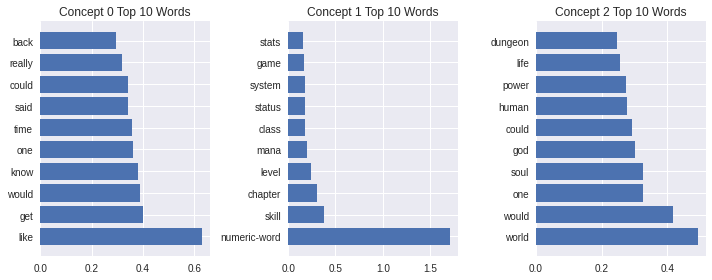

In [61]:
word_concept(H,1 , 3)

In [57]:
def book_concepts(W, prow, pcol):
    # Top 10 books in concept
    books_concept = []

    for con in range(0, W.shape[1]):
        books_concept.append(W.iloc[:, con].sort_values(ascending = False)[0:10])

    # Draw Chart
    fig, axs = plt.subplots(prow, pcol, figsize = (7, 8))

    for i, ax in enumerate(axs.flatten()):
        ax.barh(y = books_concept[i].index, width = books_concept[i].values)
        ax.set_title(f'Concept {i} Top 10 Books')


    plt.tight_layout()

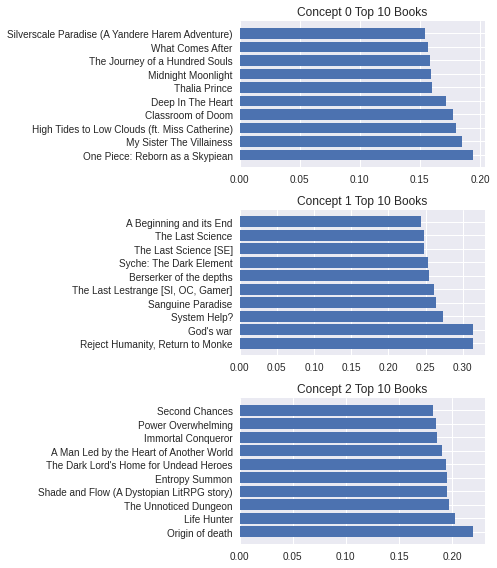

In [58]:
book_concepts(W, 3, 1)

In [30]:
# Explore Chapters 
# Make a tifd vector
tfid_ch1 = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid_ch1.fit(books.ch1)
# Trasform and get features names
X_ch1= tfid_ch1.transform(books.ch1)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


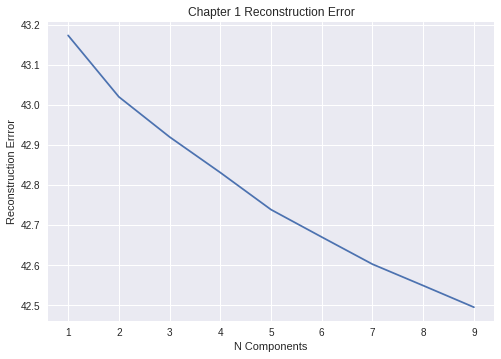

In [40]:
# Find the optimal number of components 
plot_error(X_ch1, 10, title = 'Chapter 1 Reconstruction Error')

In [70]:
W_ch1, H_ch1 = compute_nmf(X_ch1, tfid_ch1, 3)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


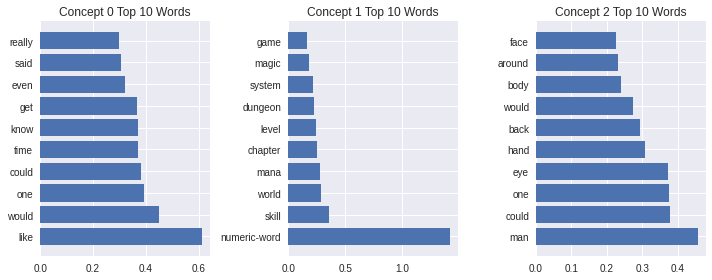

In [71]:
word_concept(H_ch1, 1, 3)

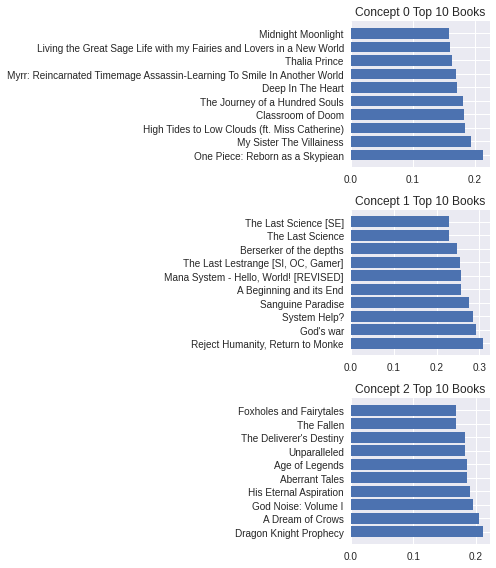

In [72]:
book_concepts(W_ch1, 3, 1)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


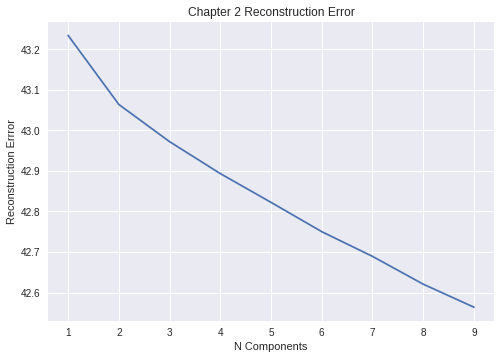

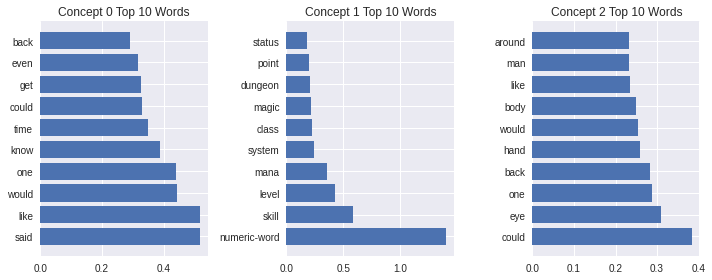

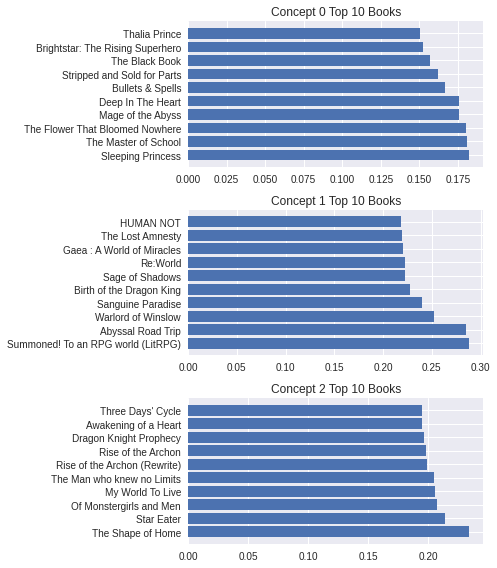

In [73]:
# Explore Chapters 2
# Make a tifd vector
tfid_ch2 = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid_ch2.fit(books.ch2)
# Trasform and get features names
X_ch2 = tfid_ch2.transform(books.ch2)

# Find the optimal number of components 
plot_error(X_ch2, 10, title = 'Chapter 2 Reconstruction Error')

W_ch2, H_ch2 = compute_nmf(X_ch2, tfid_ch2, 3)
word_concept(H_ch2, 1, 3)
book_concepts(W_ch2, 3, 1)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


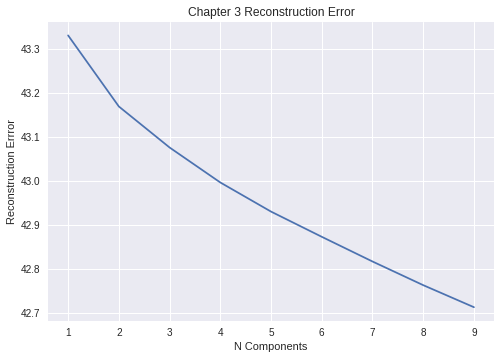

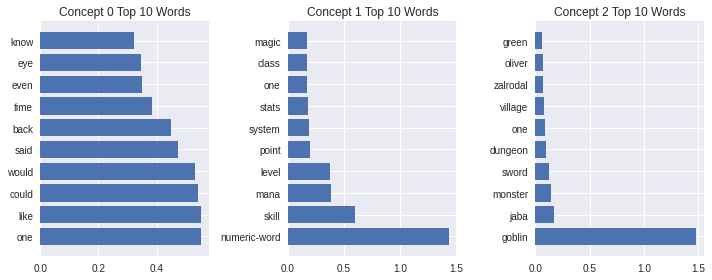

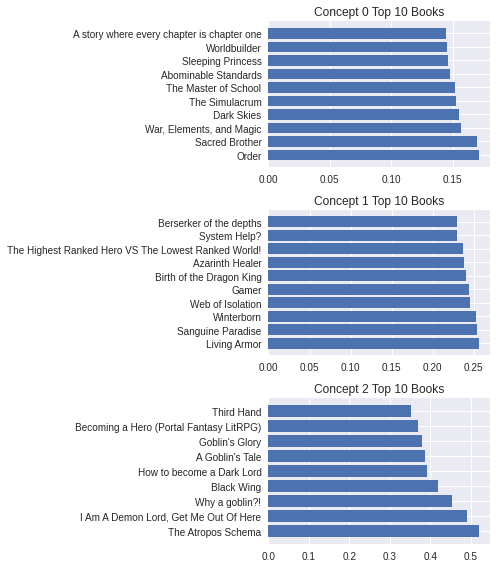

In [74]:
# Explore Chapters 3
# Make a tifd vector
tfid_ch3 = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid_ch3.fit(books.ch3)
# Trasform and get features names
X_ch3 = tfid_ch3.transform(books.ch3)

# Find the optimal number of components 
plot_error(X_ch3, 10, title = 'Chapter 3 Reconstruction Error')

W_ch3, H_ch3 = compute_nmf(X_ch3, tfid_ch3, 3)
word_concept(H_ch3, 1, 3)
book_concepts(W_ch3, 3, 1)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


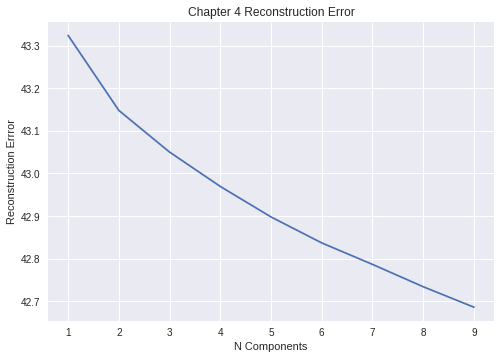

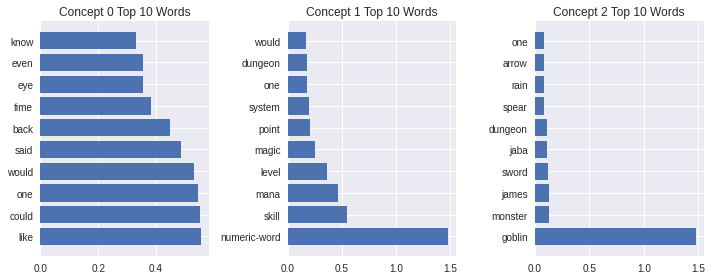

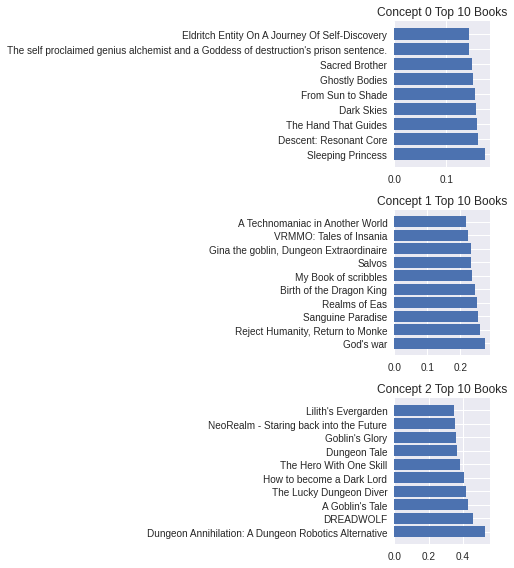

In [75]:
# Explore Chapters 4
# Make a tifd vector
tfid_ch4 = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid_ch4.fit(books.ch4)
# Trasform and get features names
X_ch4 = tfid_ch4.transform(books.ch4)

# Find the optimal number of components 
plot_error(X_ch4, 10, title = 'Chapter 4 Reconstruction Error')

W_ch4, H_ch4 = compute_nmf(X_ch4, tfid_ch4, 3)
word_concept(H_ch4, 1, 3)
book_concepts(W_ch4, 3, 1)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)


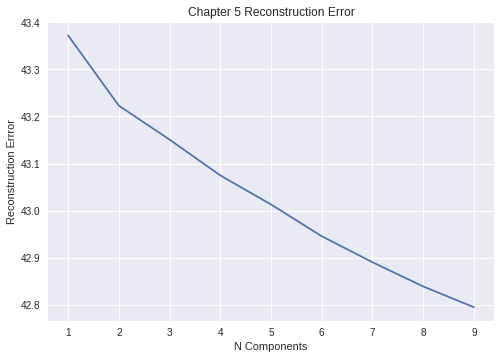

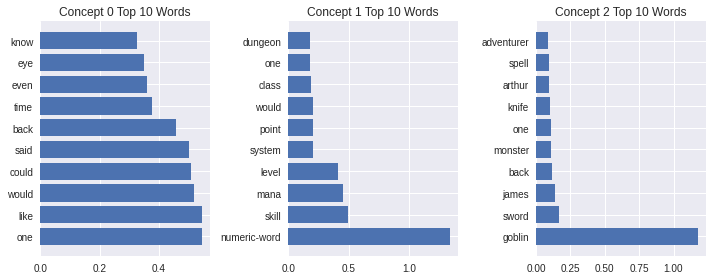

/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21476 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/noel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0, flags=flags)


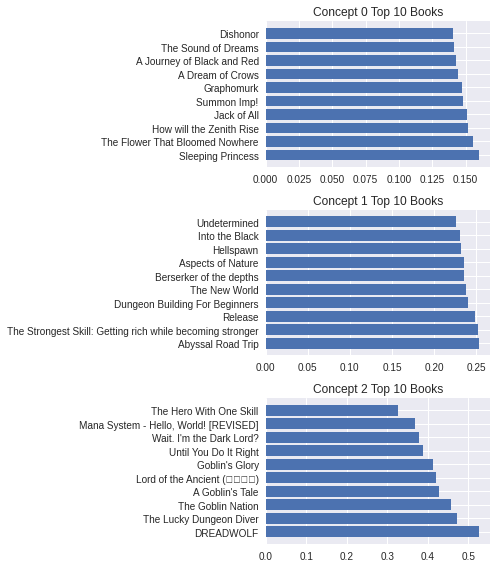

In [76]:
# Explore Chapters 5
# Make a tifd vector
tfid_ch5 = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid_ch5.fit(books.ch5)
# Trasform and get features names
X_ch5 = tfid_ch5.transform(books.ch5)

# Find the optimal number of components 
plot_error(X_ch5, 10, title = 'Chapter 5 Reconstruction Error')

W_ch5, H_ch5 = compute_nmf(X_ch5, tfid_ch5, 3)
word_concept(H_ch5, 1, 3)
book_concepts(W_ch5, 3, 1)